In [47]:
import pandas as pd
import numpy as np

In [49]:
df = pd.read_csv(r"/Users/sudeince/Desktop/data science/Stock_prices/Datasets/BAJFINANCE.csv")
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,BAJAUTOFIN,EQ,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600,3.803800e+10,NaN,NaN,NaN
1,2000-01-04,BAJAUTOFIN,EQ,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000,2.428000e+10,NaN,NaN,NaN
2,2000-01-05,BAJAUTOFIN,EQ,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500,1.591450e+10,NaN,NaN,NaN
3,2000-01-06,BAJAUTOFIN,EQ,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200,2.754750e+10,NaN,NaN,NaN
4,2000-01-07,BAJAUTOFIN,EQ,45.25,48.00,48.00,42.0,42.90,42.90,44.44,3500,1.555550e+10,NaN,NaN,NaN


In [51]:
df.set_index('Date', inplace=True)

<Axes: xlabel='Date'>

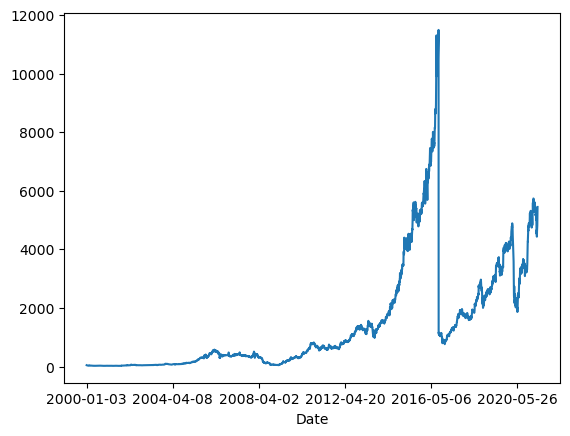

In [53]:
df['VWAP'].plot()

In [55]:
df.shape

(5235, 14)

In [57]:
df.isna().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2779
Deliverable Volume     446
%Deliverble            446
dtype: int64

In [59]:
df.dropna(inplace=True)

In [61]:
df.isna().sum()

Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [63]:
df.shape

(2456, 14)

In [65]:
data=df.copy()

In [67]:
data.dtypes

Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume    float64
%Deliverble           float64
dtype: object

In [69]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [71]:
data[['Open', 'High', 'Low', 'Close']].corr()

,Open,High,Low,Close
Open,1.000000,0.999558,0.999595,0.999240
High,0.999558,1.000000,0.999365,0.999691
Low,0.999595,0.999365,1.000000,0.999601
Close,0.999240,0.999691,0.999601,1.000000


In [93]:
lag_features=['High','Low','Volume','Turnover','Trades']
window1=3
window2=7

In [99]:
for feature in lag_features:
    data[feature+'rolling_mean_3']=data[feature].rolling(window=window1).mean()
    data[feature+'rolling_mean_7']=data[feature].rolling(window=window2).mean()

In [101]:
for feature in lag_features:
    data[feature+'rolling_std_3']=data[feature].rolling(window=window1).std()
    data[feature+'rolling_std_7']=data[feature].rolling(window=window2).std()

In [103]:
data.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Highrolling_mean_3,Highrolling_mean_7,Lowrolling_mean_3,Lowrolling_mean_7,Volumerolling_mean_3,Volumerolling_mean_7,Turnoverrolling_mean_3,Turnoverrolling_mean_7,Tradesrolling_mean_3,Tradesrolling_mean_7
Date,,,,,,,,,,,,,,,,,,,,,
2011-06-01,BAJFINANCE,EQ,616.70,617.00,636.50,616.00,627.00,631.85,627.01,6894,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-02,BAJFINANCE,EQ,631.85,625.00,638.90,620.00,634.00,633.45,636.04,2769,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-03,BAJFINANCE,EQ,633.45,625.15,637.80,620.00,623.00,625.00,625.09,51427,...,637.733333,NaN,618.666667,NaN,20363.333333,NaN,1.274338e+12,NaN,661.000000,NaN
2011-06-06,BAJFINANCE,EQ,625.00,620.00,641.00,611.35,611.35,614.00,616.03,5446,...,639.233333,NaN,617.116667,NaN,19880.666667,NaN,1.242081e+12,NaN,278.333333,NaN
2011-06-07,BAJFINANCE,EQ,614.00,604.00,623.95,604.00,619.90,619.15,617.73,5991,...,634.250000,NaN,611.783333,NaN,20954.666667,NaN,1.306735e+12,NaN,225.333333,NaN


In [105]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'Highrolling_std_3', 'Highrolling_std_7',
       'Lowrolling_std_3', 'Lowrolling_std_7', 'Volumerolling_std_3',
       'Volumerolling_std_7', 'Turnoverrolling_std_3', 'Turnoverrolling_std_7',
       'Tradesrolling_std_3', 'Tradesrolling_std_7', 'Highrolling_mean_3',
       'Highrolling_mean_7', 'Lowrolling_mean_3', 'Lowrolling_mean_7',
       'Volumerolling_mean_3', 'Volumerolling_mean_7',
       'Turnoverrolling_mean_3', 'Turnoverrolling_mean_7',
       'Tradesrolling_mean_3', 'Tradesrolling_mean_7'],
      dtype='object')

In [107]:
data.shape

(2456, 34)

In [109]:
data.isna().sum()

Symbol                    0
Series                    0
Prev Close                0
Open                      0
High                      0
Low                       0
Last                      0
Close                     0
VWAP                      0
Volume                    0
Turnover                  0
Trades                    0
Deliverable Volume        0
%Deliverble               0
Highrolling_std_3         2
Highrolling_std_7         6
Lowrolling_std_3          2
Lowrolling_std_7          6
Volumerolling_std_3       2
Volumerolling_std_7       6
Turnoverrolling_std_3     2
Turnoverrolling_std_7     6
Tradesrolling_std_3       2
Tradesrolling_std_7       6
Highrolling_mean_3        2
Highrolling_mean_7        6
Lowrolling_mean_3         2
Lowrolling_mean_7         6
Volumerolling_mean_3      2
Volumerolling_mean_7      6
Turnoverrolling_mean_3    2
Turnoverrolling_mean_7    6
Tradesrolling_mean_3      2
Tradesrolling_mean_7      6
dtype: int64

In [111]:
data.dropna(inplace=True)

In [113]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'Highrolling_std_3', 'Highrolling_std_7',
       'Lowrolling_std_3', 'Lowrolling_std_7', 'Volumerolling_std_3',
       'Volumerolling_std_7', 'Turnoverrolling_std_3', 'Turnoverrolling_std_7',
       'Tradesrolling_std_3', 'Tradesrolling_std_7', 'Highrolling_mean_3',
       'Highrolling_mean_7', 'Lowrolling_mean_3', 'Lowrolling_mean_7',
       'Volumerolling_mean_3', 'Volumerolling_mean_7',
       'Turnoverrolling_mean_3', 'Turnoverrolling_mean_7',
       'Tradesrolling_mean_3', 'Tradesrolling_mean_7'],
      dtype='object')

In [129]:
ind_features=['Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Volumerolling_mean_3',
       'Volumerolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Tradesrolling_mean_3',
       'Tradesrolling_mean_7', 'Highrolling_std_3', 'Highrolling_std_7',
       'Lowrolling_std_3', 'Lowrolling_std_7', 'Volumerolling_std_3',
       'Volumerolling_std_7', 'Turnoverrolling_std_3', 'Turnoverrolling_std_7',
       'Tradesrolling_std_3', 'Tradesrolling_std_7']

In [131]:
data.shape

(2450, 34)

In [133]:
training_data=data[0:1800]
test_data=data[1800:]

In [135]:
training_data

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Highrolling_mean_3,Highrolling_mean_7,Lowrolling_mean_3,Lowrolling_mean_7,Volumerolling_mean_3,Volumerolling_mean_7,Turnoverrolling_mean_3,Turnoverrolling_mean_7,Tradesrolling_mean_3,Tradesrolling_mean_7
Date,,,,,,,,,,,,,,,,,,,,,
2011-06-09,BAJFINANCE,EQ,635.60,639.80,647.00,630.00,630.00,631.10,638.27,31252,...,638.650000,638.592857,612.666667,615.050000,2.136867e+04,1.866314e+04,1.356553e+12,1.175452e+12,682.666667,614.142857
2011-06-10,BAJFINANCE,EQ,631.10,641.85,648.25,618.55,621.10,622.20,634.16,30885,...,646.750000,640.271429,617.516667,615.414286,2.966667e+04,2.209043e+04,1.886054e+12,1.393498e+12,1045.000000,606.142857
2011-06-13,BAJFINANCE,EQ,622.20,616.00,627.85,616.00,622.75,624.95,622.92,3981,...,641.033333,638.692857,621.516667,614.842857,2.203933e+04,2.226357e+04,1.400430e+12,1.403765e+12,834.666667,580.142857
2011-06-14,BAJFINANCE,EQ,624.95,625.00,628.95,619.95,621.20,622.10,625.35,5597,...,635.016667,637.428571,618.166667,614.835714,1.348767e+04,1.571643e+04,8.521943e+11,9.945331e+11,602.666667,589.142857
2011-06-15,BAJFINANCE,EQ,622.10,612.00,623.00,598.10,605.00,601.70,606.90,12590,...,626.600000,634.857143,611.350000,612.942857,7.389333e+03,1.673700e+04,4.540265e+11,1.055761e+12,309.666667,619.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-04,BAJFINANCE,EQ,2724.05,2724.00,2777.65,2683.50,2748.00,2746.30,2726.23,2606992,...,2870.833333,2934.485714,2746.633333,2848.814286,2.160346e+06,1.649480e+06,6.015502e+14,4.715141e+14,106854.666667,87658.142857
2018-09-05,BAJFINANCE,EQ,2746.30,2740.15,2764.80,2668.00,2704.45,2716.90,2712.53,1728455,...,2807.483333,2906.742857,2688.933333,2812.092857,2.284096e+06,1.756973e+06,6.276342e+14,4.974827e+14,95882.333333,90342.000000
2018-09-06,BAJFINANCE,EQ,2716.90,2729.00,2731.50,2671.40,2672.20,2684.10,2695.89,1147879,...,2757.983333,2870.957143,2674.300000,2775.750000,1.827775e+06,1.744707e+06,4.963438e+14,4.897104e+14,75136.333333,84844.571429


In [137]:
!pip install pmdarima

In [138]:
from pmdarima import auto_arima

In [139]:
import pmdarima
pmdarima.__version__

'2.0.4'

In [140]:
import warnings
warnings.filterwarnings('ignore')

In [145]:
model = auto_arima(y=training_data['VWAP'], X=training_data[ind_features], trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=20931.522, Time=1.44 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=20925.213, Time=1.15 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=20926.337, Time=1.24 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=20926.308, Time=1.15 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=32616.913, Time=1.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=20929.223, Time=1.29 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 7.330 seconds


In [147]:
model.fit(y=training_data['VWAP'], X=training_data[ind_features])

ARIMA(order=(0, 0, 0), scoring_args={}, suppress_warnings=True)

In [149]:
forecast = model.predict(n_periods=len(test_data), X=test_data[ind_features])

In [151]:
forecast

1800    2600.771748
1801    2625.188068
1802    2601.036481
1803    2556.439414
1804    2572.883509
           ...     
2445    4392.772696
2446    4496.796734
2447    4991.107838
2448    5292.444527
2449    5687.802278
Length: 650, dtype: float64

In [155]:
test_data['Forecast_ARIMA']= forecast

In [157]:
test_data['Forecast_ARIMA']

Date
2018-09-11   NaN
2018-09-12   NaN
2018-09-14   NaN
2018-09-17   NaN
2018-09-18   NaN
              ..
2021-04-26   NaN
2021-04-27   NaN
2021-04-28   NaN
2021-04-29   NaN
2021-04-30   NaN
Name: Forecast_ARIMA, Length: 650, dtype: float64

<Axes: xlabel='Date'>

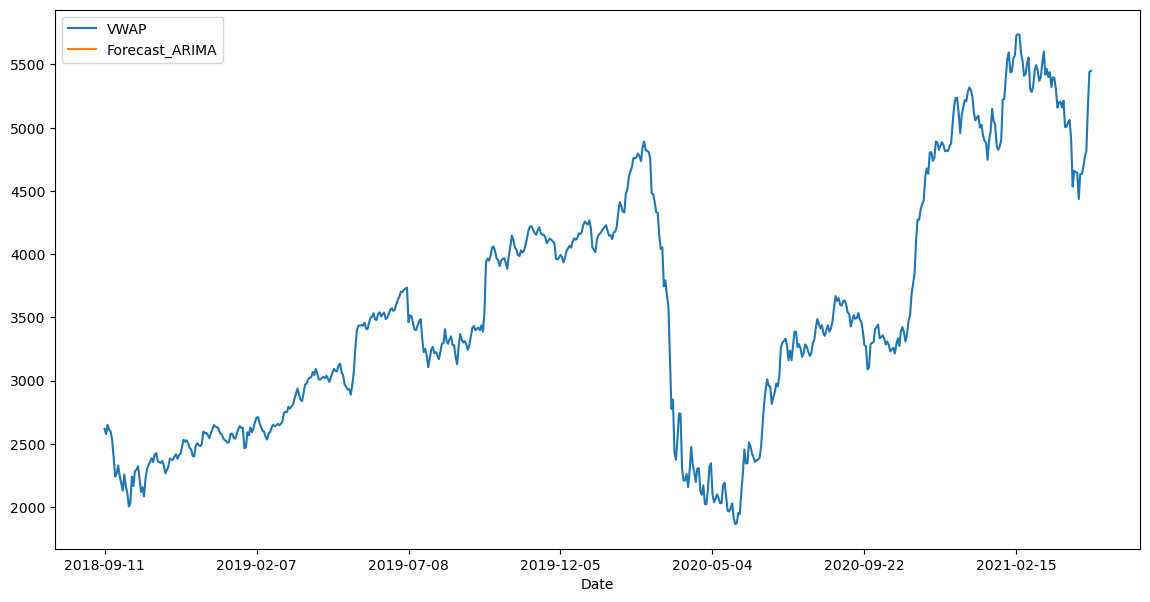

In [159]:
test_data[['VWAP','Forecast_ARIMA']].plot(figsize=(14,7))